**Importing libraries**

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

**Importing the dataset, Remove last column to appear as color**

In [263]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('zoo.csv')
df.head()
features = list(df.columns)
print(features)

features.remove('class_type')
features.remove('animal_name')

print(features)


X = df[features].values.astype(np.float32)
color = df.class_type


print(X.shape)
print(color.shape)

['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
(101, 16)
(101,)


**Find optimal number of eigenvector to be decomposed**

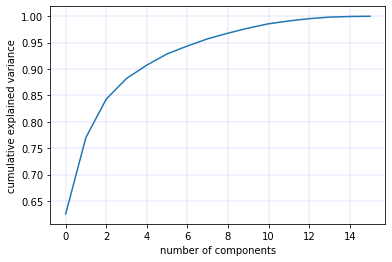

In [264]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Apply PCA and calculate data variance**

PCA Variance Ratio =  [0.29191086 0.20882927]
(101, 2)
(101,)


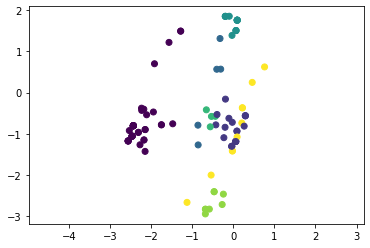

In [265]:
from sklearn.decomposition import PCA

X_standraded = StandardScaler().fit_transform(X)
ipca = PCA(n_components=2)

ipca.fit(X_standraded)
X_pca = ipca.transform(X)

X_pca_variance = ipca.explained_variance_ratio_
print ("PCA Variance Ratio = ", X_pca_variance)
print(X_pca.shape)
print(color.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
plt.axis('equal');

In [266]:
"""
from sklearn.decomposition import IncrementalPCA

X_standraded = StandardScaler().fit_transform(X)
ipca = IncrementalPCA(n_components=2, batch_size=3)

ipca.fit(X_standraded)
X_pca = ipca.transform(X)

X_pca_variance = ipca.explained_variance_ratio_
print ("PCA Variance Ratio = ", X_pca_variance)
print(X_pca.shape)
print(color.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
plt.axis('equal');
"""

'\nfrom sklearn.decomposition import IncrementalPCA\n\nX_standraded = StandardScaler().fit_transform(X)\nipca = IncrementalPCA(n_components=2, batch_size=3)\n\nipca.fit(X_standraded)\nX_pca = ipca.transform(X)\n\nX_pca_variance = ipca.explained_variance_ratio_\nprint ("PCA Variance Ratio = ", X_pca_variance)\nprint(X_pca.shape)\nprint(color.shape)\n\nplt.scatter(X_pca[:, 0], X_pca[:, 1], c=color)\nplt.axis(\'equal\');\n'

**Apply MDS and calculate data variance**

In [267]:
"""
data = np.array([[1,1],[2,2],[3,3] ])
print(data.shape)
m,n=data.shape
dist=np.zeros((m,m))

e = euclidean_distances(data)
print ("euc_dis =", e)
for i in range(m):
        a = data[i]-data
        b = np.square(a)
        dist[i] = np.sum(b,axis=1).reshape(1,m)
print ("dist_dis =", dist)
"""

'\ndata = np.array([[1,1],[2,2],[3,3] ])\nprint(data.shape)\nm,n=data.shape\ndist=np.zeros((m,m))\n\ne = euclidean_distances(data)\nprint ("euc_dis =", e)\nfor i in range(m):\n        a = data[i]-data\n        b = np.square(a)\n        dist[i] = np.sum(b,axis=1).reshape(1,m)\nprint ("dist_dis =", dist)\n'

In [268]:
def my_mds_classic(data,n_component):
    #Init
    m,n=data.shape
    dist_squ=np.zeros((m,m))
    disti=np.zeros(m)
    distj=np.zeros(m)
    S=np.zeros((m,m))

    #[D]ij^2 = ‖yi−yj‖2
    for i in range(m):
        dist_squ[i] = np.sum(np.square(data[i]-data),axis=1).reshape(1,m)
    for i in range(m):
        # D_i.^2 = 1/n \sum {i}{m} [D]ij^2
        disti[i] = np.mean(dist_squ[i,:])

        # D_.j^2 = 1/n \sum {j}{m} [D]ij^2
        distj[i] = np.mean(dist_squ[:,i])

    # D_..^2 = 1/n^2 \sum {i}{m} \sum {j}{m} [D]ij^2
    distij = np.mean(dist_squ)

    # Double Cenetering trick
    for i in range(m):
        for j in range(m):
            S[i,j] = -0.5*(dist_squ[i,j] - disti[i] - distj[j] + distij)

    #EVD of S
    lamda,V = np.linalg.eigh(S)

    # Sort the eigen value from big to small, take the first n_component portion
    index = np.argsort(-lamda)[:n_component]

    #get Lambda ^1/2
    diag_lamda = np.sqrt(np.diag(-np.sort(-lamda)[:n_component]))
    print (diag_lamda)

    #get U_n_component
    V_selected = V[:,index]

    # X =  Lambda ^1/2 * get U_n_component
    Z = V_selected.dot(diag_lamda)

    return Z

[[21.71930003  0.        ]
 [ 0.         18.37029514]]


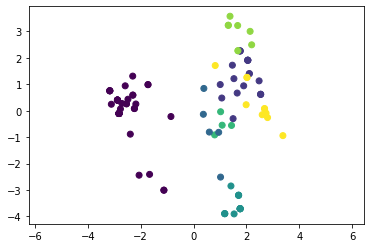

In [269]:
X_standraded = StandardScaler().fit_transform(X)

X_mds  = my_mds_classic(X_standraded,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.axis('equal');

[[20.95755788  0.        ]
 [ 0.         10.08845312]]


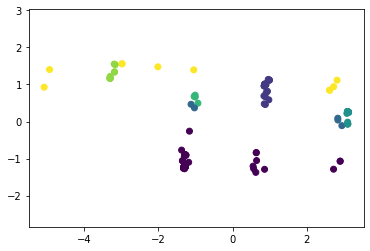

In [270]:
X_mds  = my_mds_classic(X,2)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=color)
plt.axis('equal');

Text(0.5, 1.0, 'MDS standrad and later simialrity')

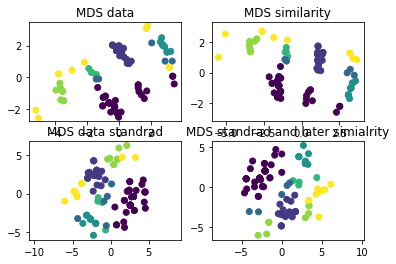

In [271]:
"""
from sklearn.manifold import MDS

fig, axs = plt.subplots(2, 2)

clf2=MDS(2)
X_t2=clf2.fit_transform(X)

axs[0,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[0,0].axis('equal');
axs[0, 0].set_title("MDS data")

dissimilarities = euclidean_distances(X)
clf2=MDS(2, dissimilarity = 'precomputed')
X_t2=clf2.fit_transform(dissimilarities)

axs[0,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[0,1].axis('equal');
axs[0, 1].set_title("MDS similarity")

X_standraded = StandardScaler().fit_transform(X)
clf2=MDS(2)
X_t2=clf2.fit_transform(X_standraded)

axs[1,0].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[1,0].axis('equal');
axs[1,0].set_title("MDS data standrad")

X_standraded = StandardScaler().fit_transform(X)
dissimilarities = euclidean_distances(X_standraded)
clf2=MDS(2, dissimilarity = 'precomputed')
X_t2=clf2.fit_transform(dissimilarities)

axs[1,1].scatter(X_t2[:, 0], X_t2[:, 1], c=color)
axs[1,1].axis('equal');
axs[1,1].set_title("MDS standrad and later simialrity")
"""

In [277]:
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_standrad = StandardScaler().fit_transform(X)

features, labels = df.drop('class_type', axis=1).values, df['class_type'].values
# features =  X_standrad.values
# labels = color.values
clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestClassifier(n_estimators=100))
print(np.mean(cross_val_score(clf, features, labels)))

nan


/Users/eyifjin/PycharmProjects/DD2434/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/eyifjin/PycharmProjects/DD2434/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eyifjin/PycharmProjects/DD2434/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eyifjin/PycharmProjects/DD2434/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/eyifjin/PycharmProjects/DD2434/venv/lib/python3.8/site-packages/sklearn/pipel

In [281]:
genetic_data = pd.read_csv('https://github.com/EpistasisLab/scikit-rebate/raw/master/data/'
                           'GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.tsv.gz',
                           sep='\t', compression='gzip')

In [6]:
features, labels = genetic_data.drop('class', axis=1).values, genetic_data['class'].values

clf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestClassifier(n_estimators=100))

print(np.mean(cross_val_score(clf, features, labels)))

NameError: name 'genetic_data' is not defined

**Apply ISOMAP and calculate data variance**

In [272]:
def dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def cosine_dist(vA, vB):
    cos = np.dot(vA, vB) / (np.sqrt(np.dot(vA,vA)) * np.sqrt(np.dot(vB,vB)))
    return  1- cos
def ratio_mismatch_dist(a,b):
    difference = np.sum(np.abs(a - b))
    dist = difference / len(a)
    return dist

In [1]:
def MDS_metric():
    pass

In [274]:
dist(X[1,],X[2,])
cosine_dist(X[1,],X[2,])
ratio_mismatch_dist(X[1,],X[2,])
print(X[1,],X[2,])

[1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.] [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
